# Practica #6 House Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras

In [2]:
#Leer el archivo
df = pd.read_csv("kc_house_data.csv")
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [12]:

# Separar variables y etiquetas
x = df[['bedrooms','bathrooms', 'sqft_living', 'sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat'
        ,'long','sqft_living15','sqft_lot15']].values
y = df[['price']].values

# Estandarizar los datos
scaler = StandardScaler()
scaler2 = StandardScaler()
x = scaler.fit_transform(x)
y = scaler2.fit_transform(y.reshape(-1,1))

# Convertir las etiquetas a formato de valores enteros
#encoder = LabelEncoder()
#y_encoded = encoder.inverse_transform(y)


In [13]:
#Dividir conjunto de datos 1. Probar y 2. Entrenar
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 41)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17290, 18) (17290, 1)
(4323, 18) (4323, 1)


In [14]:
#Crear el (M O D E L O) PERCEPTRON SIMPLE
# Crear el modelo de red neuronal con una neurona en la capa de salida
model = keras.Sequential([
    keras.layers.Dense(18, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(127, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Una neurona con activación sigmoid
])
print(model.summary())

model.compile(loss = "mae",optimizer = "adam", metrics = ["mse"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 18)                342       
                                                                 
 dense_7 (Dense)             (None, 512)               9728      
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dense_10 (Dense)            (None, 127)               16383     
                                                                 
 dense_11 (Dense)            (None, 1)                 128       
                                                                 
Total params: 190,805
Trainable params: 190,805
Non-tr

In [15]:
#Entrenar el modelo.
history = model.fit(X_train, y_train, epochs = 20)

Epoch 1/20
541/541 [==============================] - 2s 2ms/step - loss: 0.5402 - mse: 0.6518
Epoch 2/20
541/541 [==============================] - 1s 2ms/step - loss: 0.5200 - mse: 0.6179
Epoch 3/20
541/541 [==============================] - 1s 3ms/step - loss: 0.5093 - mse: 0.6063
Epoch 4/20
541/541 [==============================] - 2s 4ms/step - loss: 0.5042 - mse: 0.6010
Epoch 5/20
541/541 [==============================] - 2s 4ms/step - loss: 0.5013 - mse: 0.5985
Epoch 6/20
541/541 [==============================] - 2s 4ms/step - loss: 0.4988 - mse: 0.5962
Epoch 7/20
541/541 [==============================] - 2s 4ms/step - loss: 0.4975 - mse: 0.5949
Epoch 8/20
541/541 [==============================] - 2s 4ms/step - loss: 0.4960 - mse: 0.5936
Epoch 9/20
541/541 [==============================] - 2s 4ms/step - loss: 0.4948 - mse: 0.5926
Epoch 10/20
541/541 [==============================] - 2s 4ms/step - loss: 0.4938 - mse: 0.5916
Epoch 11/20
541/541 [============================

In [16]:
#Ver los resultados
print(model.evaluate(X_test, y_test))

136/136 [==============================] - 0s 2ms/step - loss: 0.5245 - mse: 0.8075
[0.5245112180709839, 0.8074784874916077]


In [17]:
#Evaluar el modelo y ver su presición y saber si es confiable.
sample = X_test[4, :]
prediction = model.predict(np.expand_dims(sample,axis=0))

prediction = 0 if prediction<=0.5 else 1

print(prediction)


1/1 [==============================] - 0s 54ms/step
1


In [18]:
print(y_test [4]== prediction)

[False]


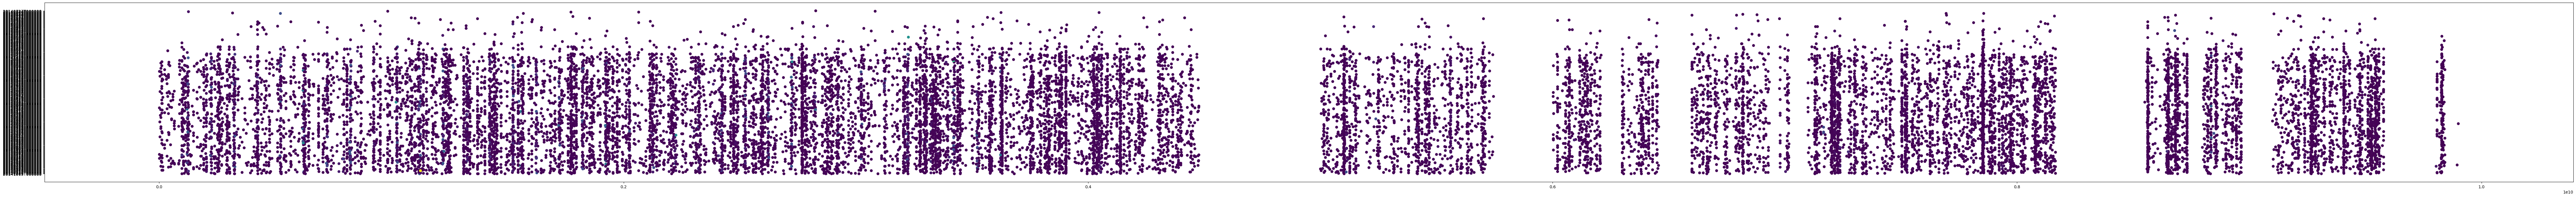

In [19]:
from matplotlib import pyplot as plt
plt.figure(figsize=[112,8])
plt.scatter(df.iloc[:,0].values,df.iloc[:,1].values,
            c= df.iloc[:,-1].values)
plt.show()

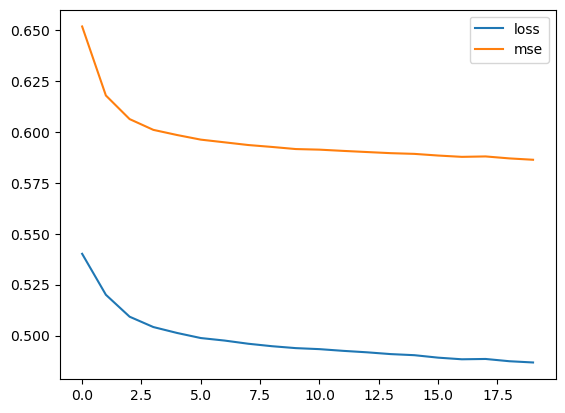

In [20]:
values=pd.DataFrame(history.history)
values.plot()
plt.show()